<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import bs4
from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
#Load in the data and create a df

import requests

df = pd.read_csv('job_listings.csv')
                
df.head(20)

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist
5,5,b'<div>Create various Business Intelligence An...,Data Scientist
6,6,b'<div><p>As Spotify Premium swells to over 96...,Associate Data Scientist – Premium Analytics
7,7,"b""Everytown for Gun Safety, the nation's large...",Data Scientist
8,8,"b""<ul><li>MS in a quantitative discipline such...",Sr. Data Scientist
9,9,b'<div><p>Slack is hiring experienced data sci...,"Data Scientist, Lifecyle"


In [3]:
#Let's clean_up the text :) Thank you BeautifulSoup and Google! 

def clean_up(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.replace('/', ' ') #replace with a space
    text = text.replace('\\n', ' ') #ditto
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text) #using regex to make only numbers and letters
    text = re.sub(r'(x.[0-9])', '', text) #again to remove the odd characters
    text = text[1:] #forgot about that first 'b' that keeps popping up! 
    text = text.lower() #Bruno says to keep it all uniform :) 
    return text

#Now we need to implement to clean_up the description column
for i in range(0, len(df)):
    df['description'][i] = clean_up(df['description'][i])
    
#Now let's look at an example to see if it worked!
df['description'][2]

C:\Users\Ashley\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


'as a data scientist you will be working on consulting side of our business you will be responsible for analyzing large complex datasets and identify meaningful patterns that lead to actionable recommendations you will be performing thorough testing and validation of models and support various aspects of the business with data analytics ability to do statistical modeling build predictive models and leverage machine learning algorithms this position will combine the typical data scientist math and analytical skills with research advanced business communication and presentation skills primary job location is in sacramento but workfromhome option is available  qualifications bachelors ms or phd in a relevant field computer science engineering statistics physics applied math experience in r and or python is preferred'

## 2) Use Spacy to tokenize the listings 

In [4]:
#Let's work on Spacy!
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [5]:
#Using STOP_WORDS
STOP_WORDS = nlp.Defaults.stop_words.union(['work', 'working', 'job', 'apply', 'company', 'internship', 'opportunity'])

In [6]:
#now we use Tokenizer and lemmatize and remove the stop words and spaces
tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = []
    for token in doc:
        if(token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)
    tokens.append(doc_tokens)

In [7]:
df['tokens'] = tokens
df['tokens'].head()

0    [requirement, conceptual, understand, machine,...
1    [description, datum, scientist, 1, help, build...
2    [datum, scientist, consult, business, responsi...
3    [4969, 6756, monthcontractunder, general, supe...
4    [location, usa, multiple, location, 2, year, a...
Name: tokens, dtype: object

In [8]:
#Let's look back to the lecture for help on the word counter
from collections import Counter

def count(docs):
    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [9]:
#This takes me back to the first assignment :) 

wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
23,datum,422,4292,1.0,0.033363,0.033363,0.990610
37,experience,410,1999,2.0,0.015539,0.048902,0.962441
216,team,370,1363,3.0,0.010595,0.059497,0.868545
139,business,324,1251,4.0,0.009724,0.069221,0.760563
6,model,330,1248,5.0,0.009701,0.078922,0.774648


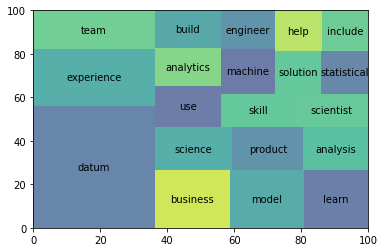

In [10]:
#Let's visualize with a graph
import squarify

wc_top25 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top25['pct_total'], label=wc_top25['word'], alpha=.75)
plt.show()

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [11]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.text != ' ')]

In [17]:
#not gonna lie, totally leaned on the lectures for this one!
from sklearn.feature_extraction.text import CountVectorizer


# create the transformer
vect = CountVectorizer(tokenizer=tokenize, stop_words=STOP_WORDS)

# build vocab
vect.fit(df['description'])

# transform text
dtm = vect.transform(df['description'])
print(dtm.shape)

(426, 7695)


In [18]:
#I really enjoyed seeing todense, so let's do it

dtmwc = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtmwc.head()

,,-PRON-,0,00,02,02115,03,030,030547069,04,...,zfs,zheng,zillow,zillows,zogsports,zone,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [19]:
sums = dtm.sum(axis=0)
word_freq = [(word, sums[0, idx]) for word, idx in vect.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
word_freq[:25]

[('datum', 2979),
 ('experience', 1935),
 ('team', 1361),
 ('data', 1313),
 ('business', 1251),
 ('science', 970),
 ('model', 915),
 ('product', 891),
 ('analysis', 809),
 ('analytic', 786),
 ('skill', 718),
 ('scientist', 706),
 ('machine', 703),
 ('build', 643),
 ('develop', 622),
 ('learn', 576),
 ('statistical', 576),
 ('solution', 569),
 ('help', 558),
 ('include', 555),
 ('ability', 554),
 ('customer', 551),
 ('new', 530),
 ('problem', 527),
 ('technology', 519)]

In [20]:
df_top25 = pd.DataFrame(word_freq[:25])
df_top25.head(25)

,0,1
0,datum,2979
1,experience,1935
2,team,1361
3,data,1313
4,business,1251
5,science,970
6,model,915
7,product,891
8,analysis,809
9,analytic,786


## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [23]:
#Set our params for the stop words, max number the words appear in, percentage they appear in etc.
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.95, 
                        min_df=5,
                        tokenizer=tokenize)

#fitting to tokenize and build vocab
tfidf.fit(df['description'])

#transform
dtm = tfidf.transform(df['description']) # Similiar to fit_predict

#Use feature names as df column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

#view as df
dtm.head()

,,ability,datum,deep,develop,disability,experience,gender,look,math,...,year handson,year industry,year professional,year related,year relevant,year work,yes,york,york city,york office
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [24]:
from sklearn.neighbors import NearestNeighbors

#fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [25]:
my_ideal = ["""The job includes machine learning, making predictions, cleaning data, AI"""]

In [26]:
new = tfidf.transform(my_ideal)
nn.kneighbors(new.todense())

(array([[1.24071321, 1.30898063, 1.31220734, 1.31765713, 1.31866916]]),
 array([[ 17, 151, 396, 349,  53]], dtype=int64))

In [27]:
df['description'][25]

'as a data scientist for ads measurement in the partners org you will work on projects to demonstrate and create a generalizable value of the pinterest platform to partners you will use various scientific techniques to conduct research and test both internally and externally to help advertisers get the most out of pinterest and meet their business goals  what youll do  work on a broad range of topics to efficiently measure and improve ad effectiveness for advertisers use various statistical methods and or machine learning algorithms to build rigorous and effective partnerfacing solutions work crossfunctionally with business stakeholders product and engineering to test experimentally and implement the research findings participate actively as a statistical and technical consultant for the analytics community at pinterest  what were looking for  advanced degree in a quantitative field with 2 years of industry experience in a quantitative field has proven track record of applying scientif

In [28]:
df['description'][100]

'description a rare opportunity to join the development division within information systems at steward health care the top leader in the competitive forprofit hospital industry we are seeking a motivated and experienced data scientist to contribute to the software development initiatives that improve the quality of health care across the country this individual will be working with programmers analysts and senior level management to optimize the development process within the enterprise by expanding our existing predictive analytics field key responsibilities conduct research and build actionable visualizations that drive decisions collect data required to extract actionable insights work with the subject matter experts and key stakeholders to understand end goals for enhancements and new predictive tools values critical thinking and has the ability to solve complex problems with incomplete data and a genuine curiosity contribute to the teams overall knowledge by educating colleagues a

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 